In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/Mock Up Data'

!pip install ace

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ace
import os

os.chdir(path)
data = pd.read_csv('water_potability.csv')

In [ ]:
# Get a summary of the dataset structure, including missing values, types, and a quick description of the numerical data
data_info = data.info()
data_description = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

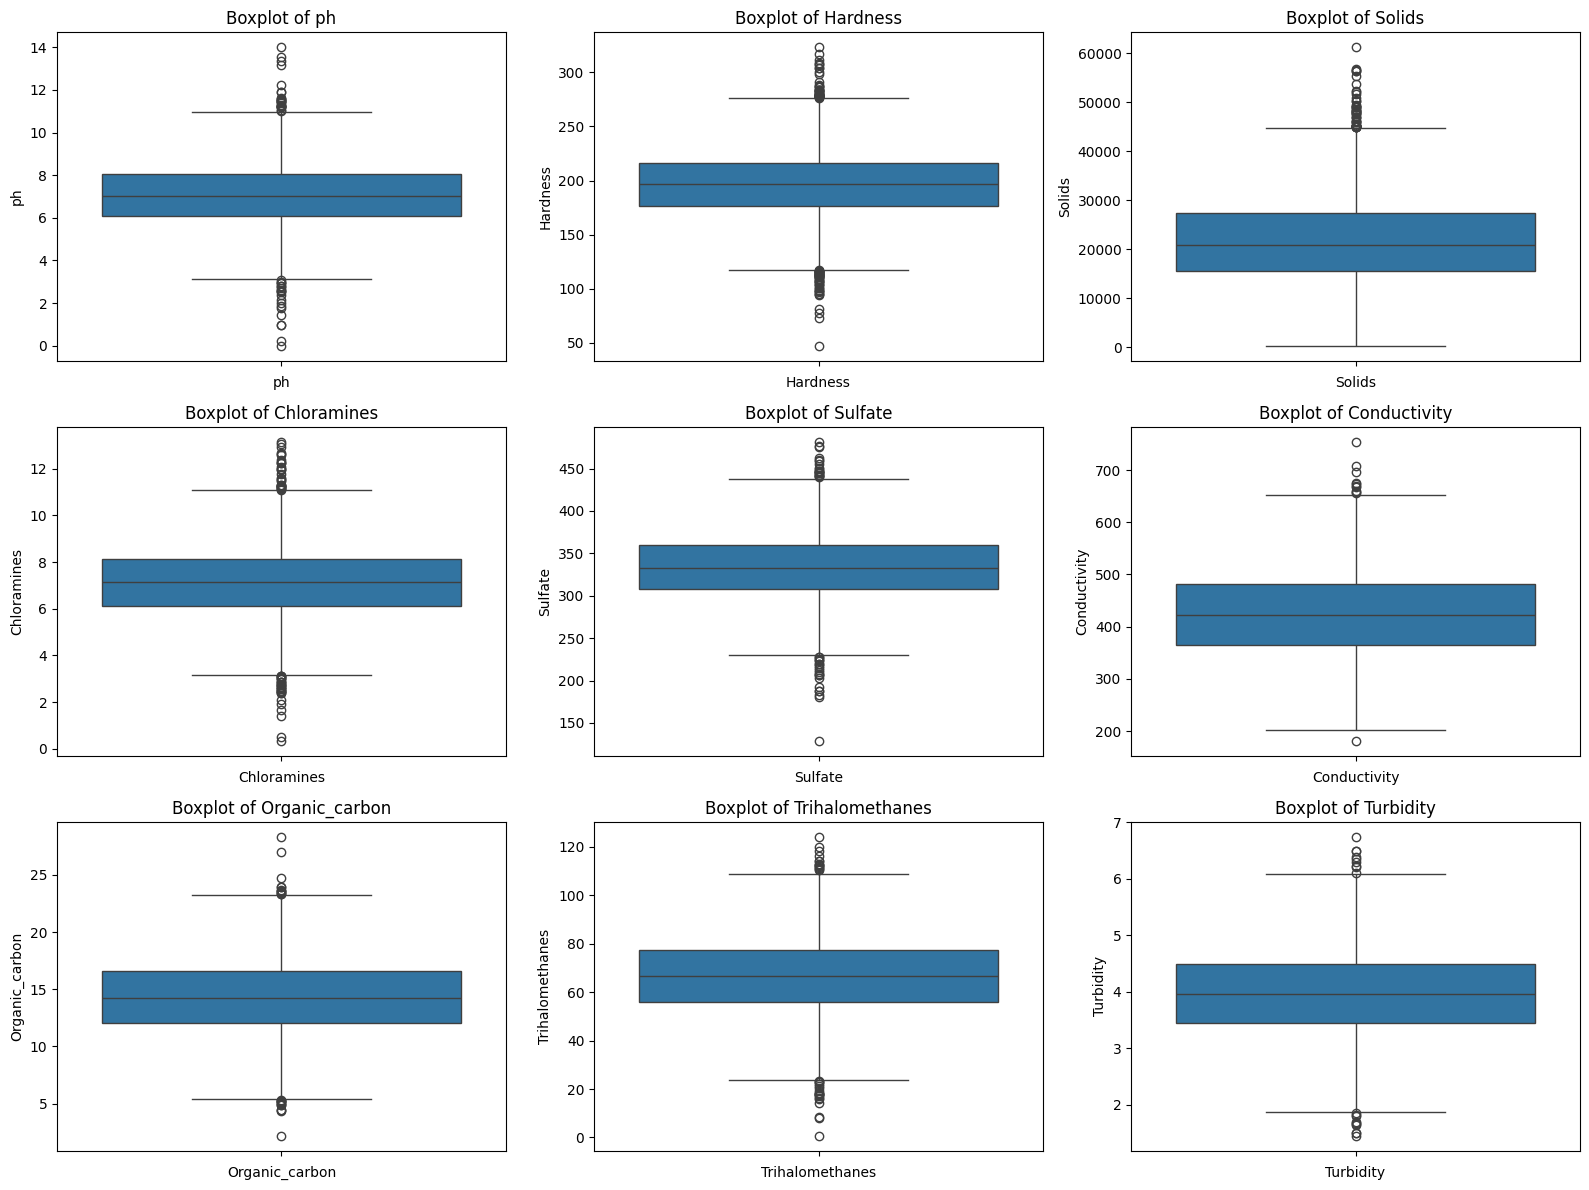

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns of interest for outlier detection
columns_of_interest = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create boxplots for each column to visualize potential outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


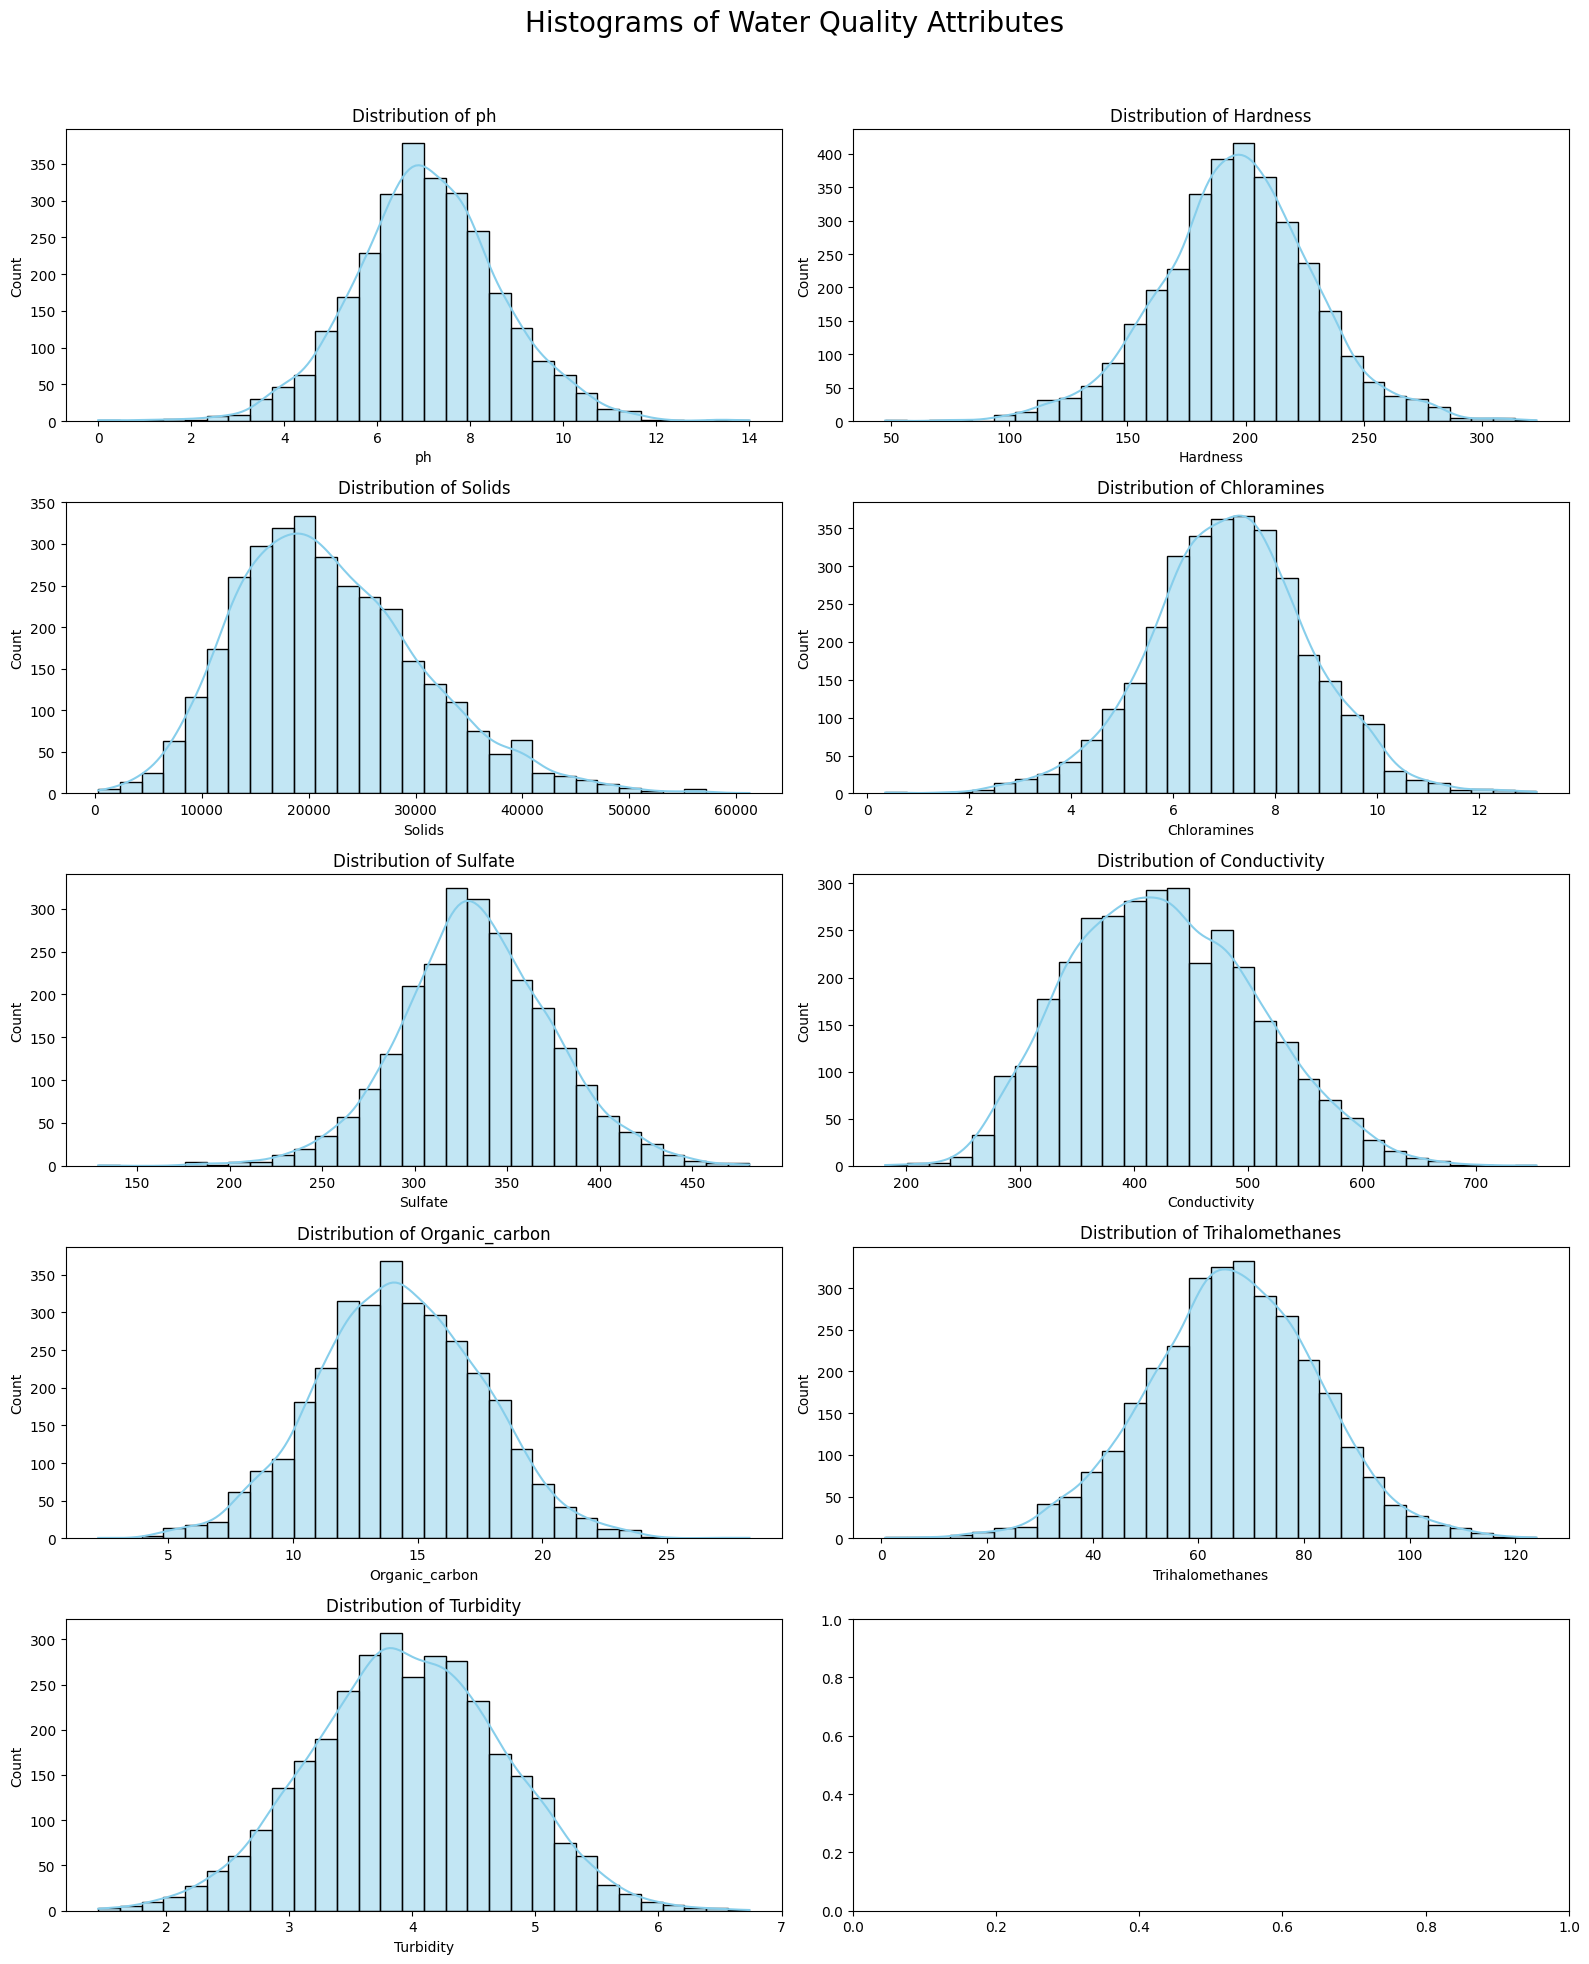

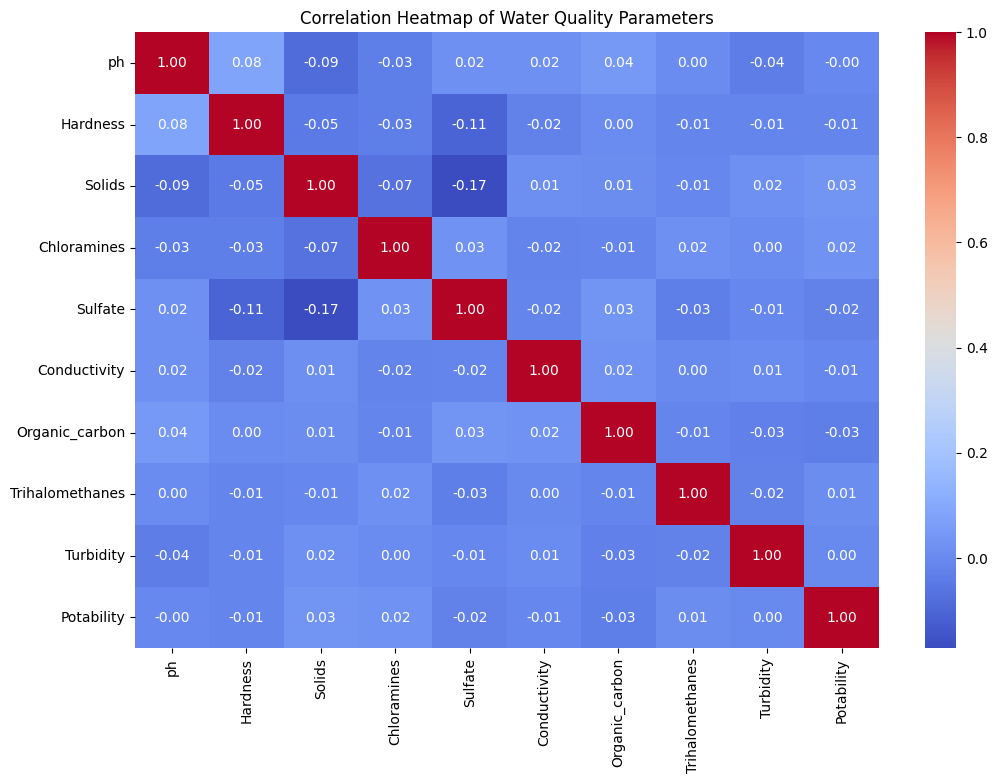

Descriptive Statistics of Water Quality Data:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162

In [ ]:
water_data = data.copy()

# 2. Descriptive Statistics
data_statistics = water_data.describe()

# 3. Missing Values Analysis
missing_values = water_data.isnull().sum()

# 4. Distribution Analysis: Histograms
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
fig.suptitle("Histograms of Water Quality Attributes", fontsize=20)

# List of columns to plot
columns = water_data.columns[:-1]  # Exclude 'Potability'

# Plot histograms
for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Determine position
    sns.histplot(water_data[col].dropna(), bins=30, kde=True, ax=ax, color='skyblue')
    ax.set_title(f"Distribution of {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout

# 5. Correlation Matrix
correlation_matrix = water_data.corr()

# Display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.show()

# 6. Potability Class Balance
class_balance = water_data['Potability'].value_counts()

# Show the descriptive statistics
print("Descriptive Statistics of Water Quality Data:")
print(data_statistics)

# Show the missing values
print("\nMissing Values in Each Column:")
print(missing_values)

# Show the Potability class balance
print("\nPotability Class Balance:")
print(class_balance)


In [ ]:
missing_data = data.isnull().mean() * 100  # Calculate missing values as a percentage

# Display the missing data as a percentage
missing_data_percentage = missing_data.sort_values(ascending=False)

# Output the results for review
missing_data_percentage

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

<ipython-input-18-971a726cba6f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=potability_percentage.index, y=potability_percentage, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


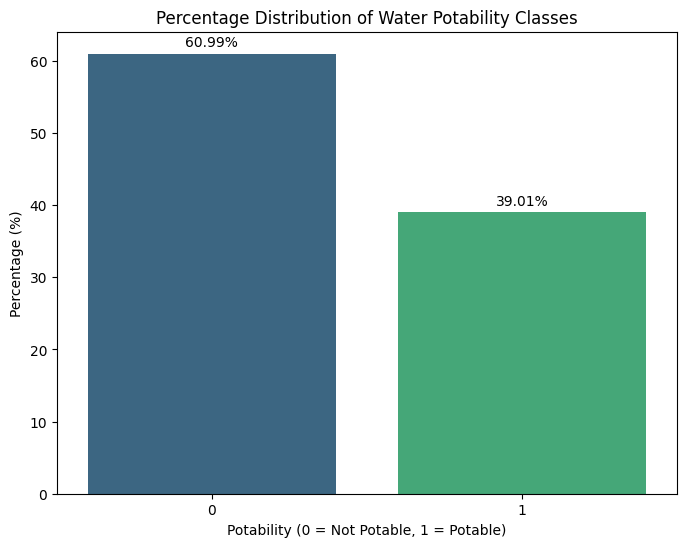

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

In [ ]:
# Calculate the percentage distribution of the Potability class
potability_percentage = data['Potability'].value_counts(normalize=True) * 100

# Plot the percentage distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=potability_percentage.index, y=potability_percentage, palette='viridis')
plt.title("Percentage Distribution of Water Potability Classes")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Percentage (%)")
for index, value in enumerate(potability_percentage):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center')
plt.show()

# Display the percentage values
potability_percentage


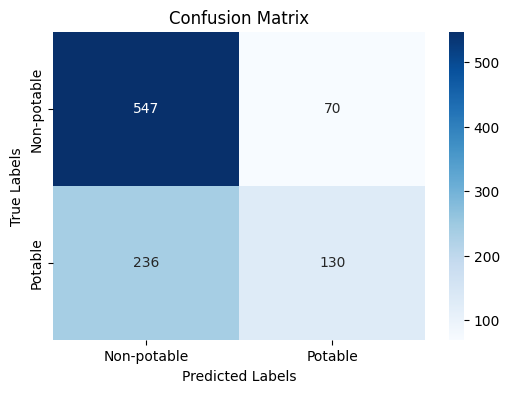


# Random Forest Model Evaluation Results

## Accuracy:
Accuracy of the model on the test set: **0.6887**

## Confusion Matrix:
[[547  70]
 [236 130]]

## Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983




In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Handle Missing Values by filling with mean values for each column
data_filled = data.fillna(data.mean())

# Step 2: Split the data into features and target
X = data_filled.drop("Potability", axis=1)
y = data_filled["Potability"]

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 7: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-potable", "Potable"], yticklabels=["Non-potable", "Potable"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 9: Organize results in a structured format
model_performance = {
    "Accuracy": accuracy,
    "Precision (Class 0 - Non-potable)": classification_rep.split()[11],
    "Recall (Class 0 - Non-potable)": classification_rep.split()[12],
    "F1-Score (Class 0 - Non-potable)": classification_rep.split()[13],
    "Precision (Class 1 - Potable)": classification_rep.split()[16],
    "Recall (Class 1 - Potable)": classification_rep.split()[17],
    "F1-Score (Class 1 - Potable)": classification_rep.split()[18],
}

# Display the evaluation results
results_summary = f"""
# Random Forest Model Evaluation Results

## Accuracy:
Accuracy of the model on the test set: **{accuracy:.4f}**

## Confusion Matrix:
{conf_matrix}

## Classification Report:
{classification_rep}
"""

# Print the results
print(results_summary)


In [ ]:
# Create missing indicator features for columns with missing values
data['ph_missing'] = data['ph'].isnull().astype(int)
data['Sulfate_missing'] = data['Sulfate'].isnull().astype(int)
data['Trihalomethanes_missing'] = data['Trihalomethanes'].isnull().astype(int)

# Verify the new columns added to the dataframe
missing_indicators = data[['ph_missing', 'Sulfate_missing', 'Trihalomethanes_missing']].head()
missing_indicators

ph_missing  Sulfate_missing  Trihalomethanes_missing
0           1                0                        0
1           0                1                        0
2           0                1                        0
3           0                0                        0
4           0                0                        0

In [ ]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225              NaN   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

      ph_missing  Sulfate_missing  Trihalomethanes_missing  
0              1                0                        0  
1              0                1                        0  
2              0                1                        0  
3              0                0                        0  
4              0                0                        0  
...          ...              ...                      ...  
3271           0                0                        0  
3272           0                1                        1  
3273           0                1                        0  
3274           0                1                        0  
3275           0                1                        0  

[3276 rows x 13 columns]

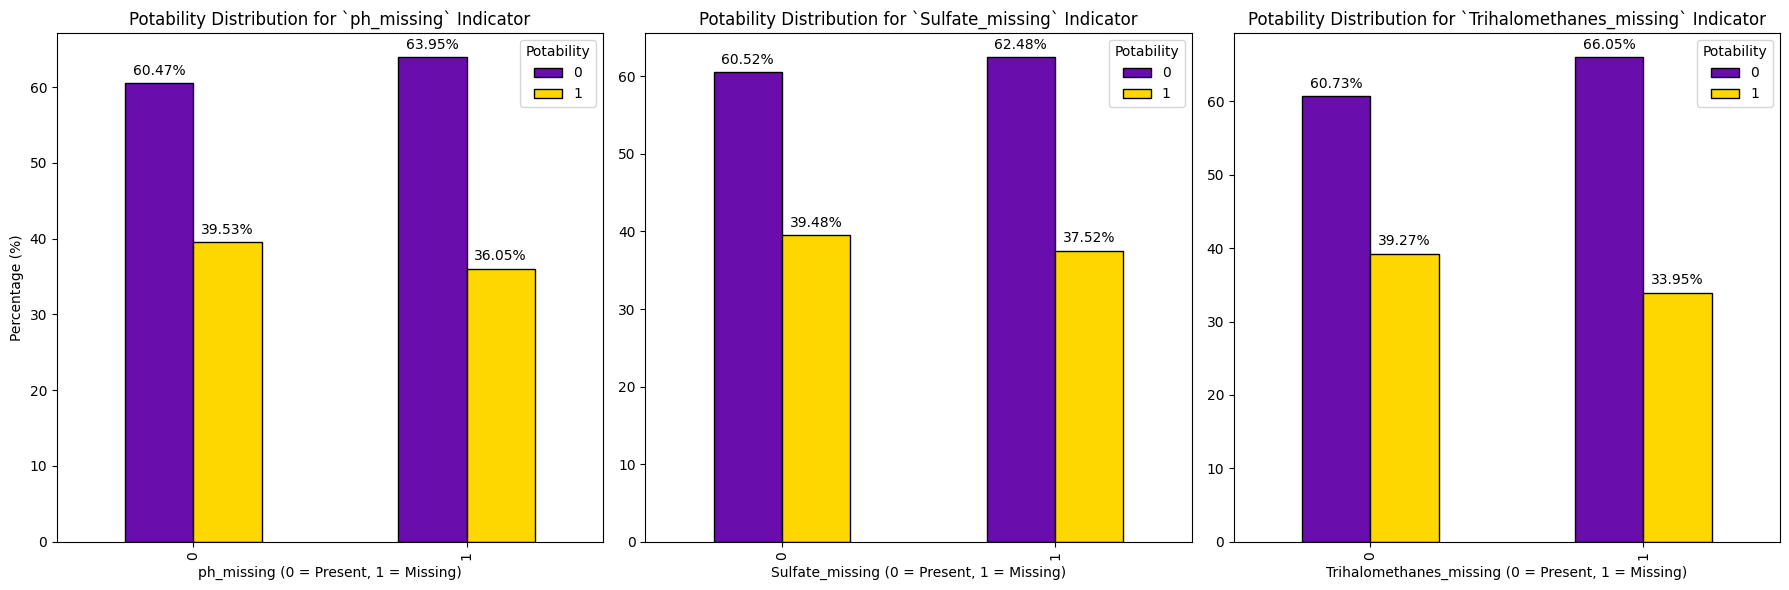

(Potability          0          1
 ph_missing                      
 0           60.466786  39.533214
 1           63.951120  36.048880,
 Potability               0          1
 Sulfate_missing                      
 0                60.521042  39.478958
 1                62.483995  37.516005,
 Potability                       0          1
 Trihalomethanes_missing                      
 0                        60.725755  39.274245
 1                        66.049383  33.950617)

In [ ]:
# Analyzing the relationship between missing indicators and Potability

# Calculate percentage of Potability classes (0 and 1) for rows where `ph` is missing vs. present
ph_potability_distribution = data.groupby('ph_missing')['Potability'].value_counts(normalize=True).unstack() * 100

# Calculate percentage of Potability classes for `Sulfate` missing indicator
sulfate_potability_distribution = data.groupby('Sulfate_missing')['Potability'].value_counts(normalize=True).unstack() * 100

# Calculate percentage of Potability classes for `Trihalomethanes` missing indicator
trihalomethanes_potability_distribution = data.groupby('Trihalomethanes_missing')['Potability'].value_counts(normalize=True).unstack() * 100

# Plotting the distribution of Potability for missing indicators
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for `ph_missing`
ph_potability_distribution.plot(kind='bar', ax=axs[0], color=['#6a0dad', '#FFD700'], edgecolor='black')
axs[0].set_title("Potability Distribution for `ph_missing` Indicator")
axs[0].set_xlabel("ph_missing (0 = Present, 1 = Missing)")
axs[0].set_ylabel("Percentage (%)")
for p in axs[0].patches:
    axs[0].annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Plot for `Sulfate_missing`
sulfate_potability_distribution.plot(kind='bar', ax=axs[1], color=['#6a0dad', '#FFD700'], edgecolor='black')
axs[1].set_title("Potability Distribution for `Sulfate_missing` Indicator")
axs[1].set_xlabel("Sulfate_missing (0 = Present, 1 = Missing)")
for p in axs[1].patches:
    axs[1].annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Plot for `Trihalomethanes_missing`
trihalomethanes_potability_distribution.plot(kind='bar', ax=axs[2], color=['#6a0dad', '#FFD700'], edgecolor='black')
axs[2].set_title("Potability Distribution for `Trihalomethanes_missing` Indicator")
axs[2].set_xlabel("Trihalomethanes_missing (0 = Present, 1 = Missing)")
for p in axs[2].patches:
    axs[2].annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

# Output the raw percentage distribution values
ph_potability_distribution, sulfate_potability_distribution, trihalomethanes_potability_distribution


In [ ]:
from sklearn.impute import KNNImputer

# Step 1: Median Imputation for `ph` and `Sulfate`
data['ph'].fillna(data['ph'].median(), inplace=True)
data['Sulfate'].fillna(data['Sulfate'].median(), inplace=True)

# Step 2: KNN Imputation for `Trihalomethanes`
# Use only the relevant features for KNN imputation
knn_features = data[['Trihalomethanes', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Turbidity']]
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed_data = knn_imputer.fit_transform(knn_features)

# Update the `Trihalomethanes` column with imputed values
data['Trihalomethanes'] = knn_imputed_data[:, 0]

# Verify if all missing values are handled
missing_after_imputation = data.isnull().sum()

# Output the missing value check
missing_after_imputation


<ipython-input-23-a87c74ad7201>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ph'].fillna(data['ph'].median(), inplace=True)
<ipython-input-23-a87c74ad7201>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

ph                         0
Hardness                   0
Solids                     0
Chloramines                0
Sulfate                    0
Conductivity               0
Organic_carbon             0
Trihalomethanes            0
Turbidity                  0
Potability                 0
ph_missing                 0
Sulfate_missing            0
Trihalomethanes_missing    0
dtype: int64

In [ ]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  \
count   3276.000000     3276.000000      3276.000000  3276.000000   
mean     426.205111       14.284970        66.415472     3.966786   
std       80.824064        3.308162        15.838078     0.780382   
min      181.483754        2.200000         0.738000     1.450000   
25%      365.734414       12.065801        56.431787     3.439711   
50%      421.884968       14.218338        66.610937     3.955028   
75%      481.792304       16.557652        76.905417     4.500320   
max      753.342620       28.300000       124.000000     6.739000   

        Potability   ph_missing  Sulfate_missing  Trihalomethanes_missing  
count  3276.000000  3276.000000       3276.00000              3276.000000  
mean      0.390110     0.149878          0.23840                 0.049451  
std       0.487849     0.357006          0.42617                 0.216840  
min       0.000000     0.000000          0.00000                 0.000000  
25%       0.000000     0.000000          0.00000                 0.000000  
50%       0.000000     0.000000          0.00000                 0.000000  
75%       1.000000     0.000000          0.00000                 0.000000  
max       1.000000     1.000000          1.00000                 1.000000

In [ ]:
data.to_csv('water_potability_cleaned.csv', index=False)

In [ ]:
data.drop(columns=['ph_missing', 'Sulfate_missing', 'Trihalomethanes_missing'], inplace=True)

In [ ]:
data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        68.785335   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

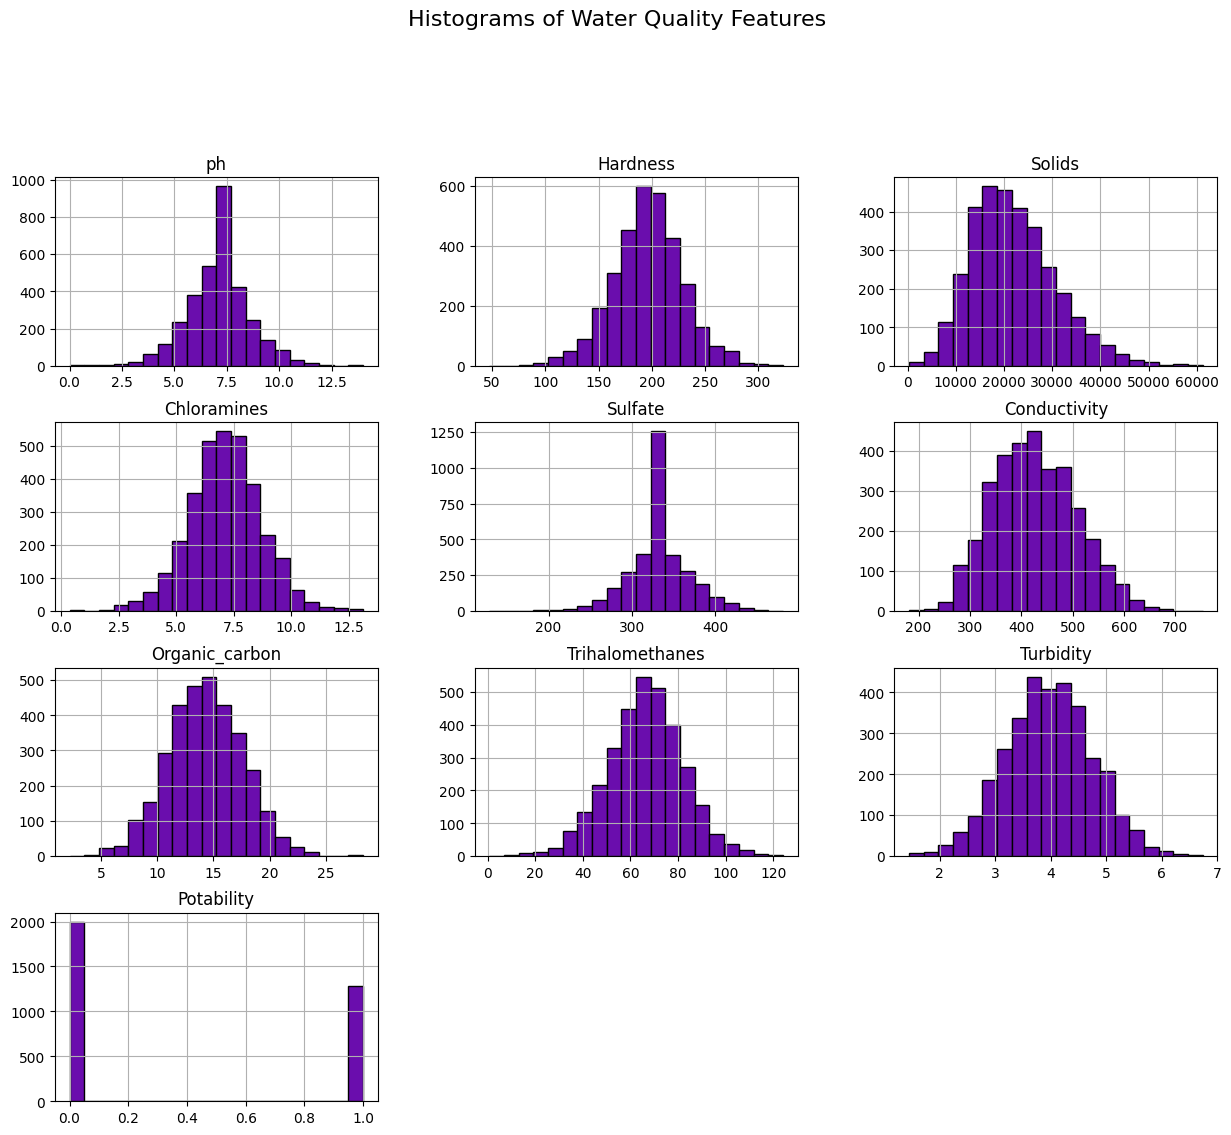

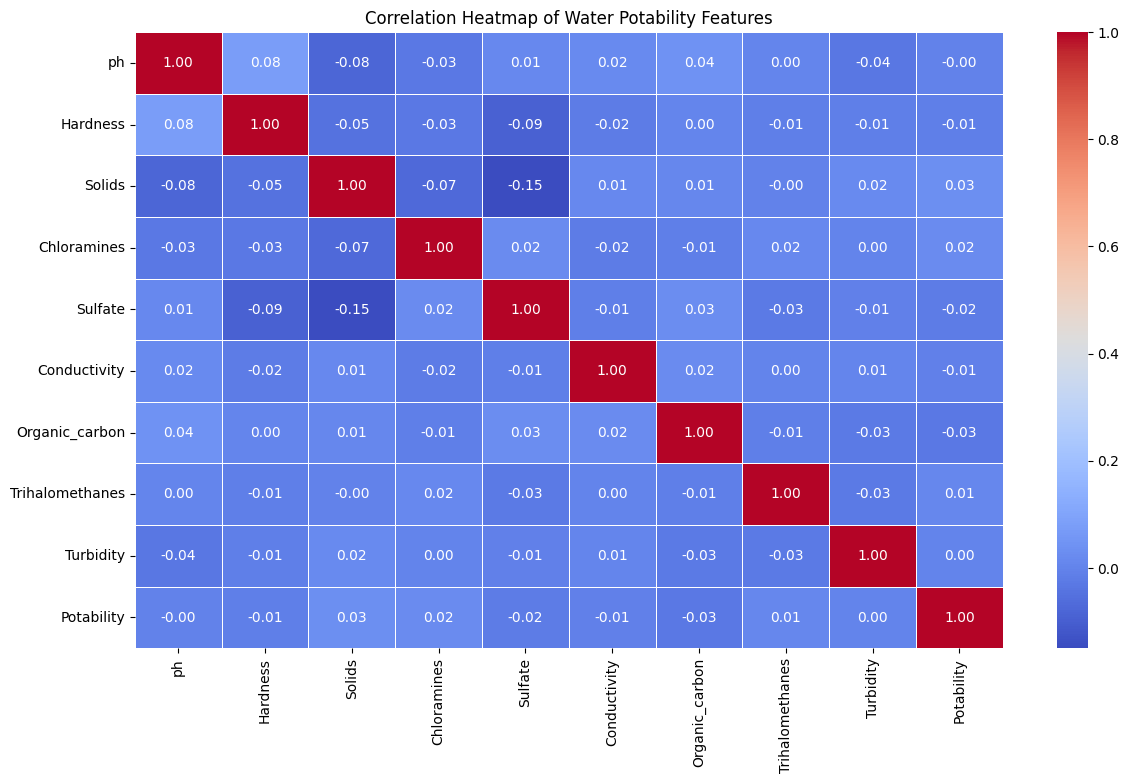

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

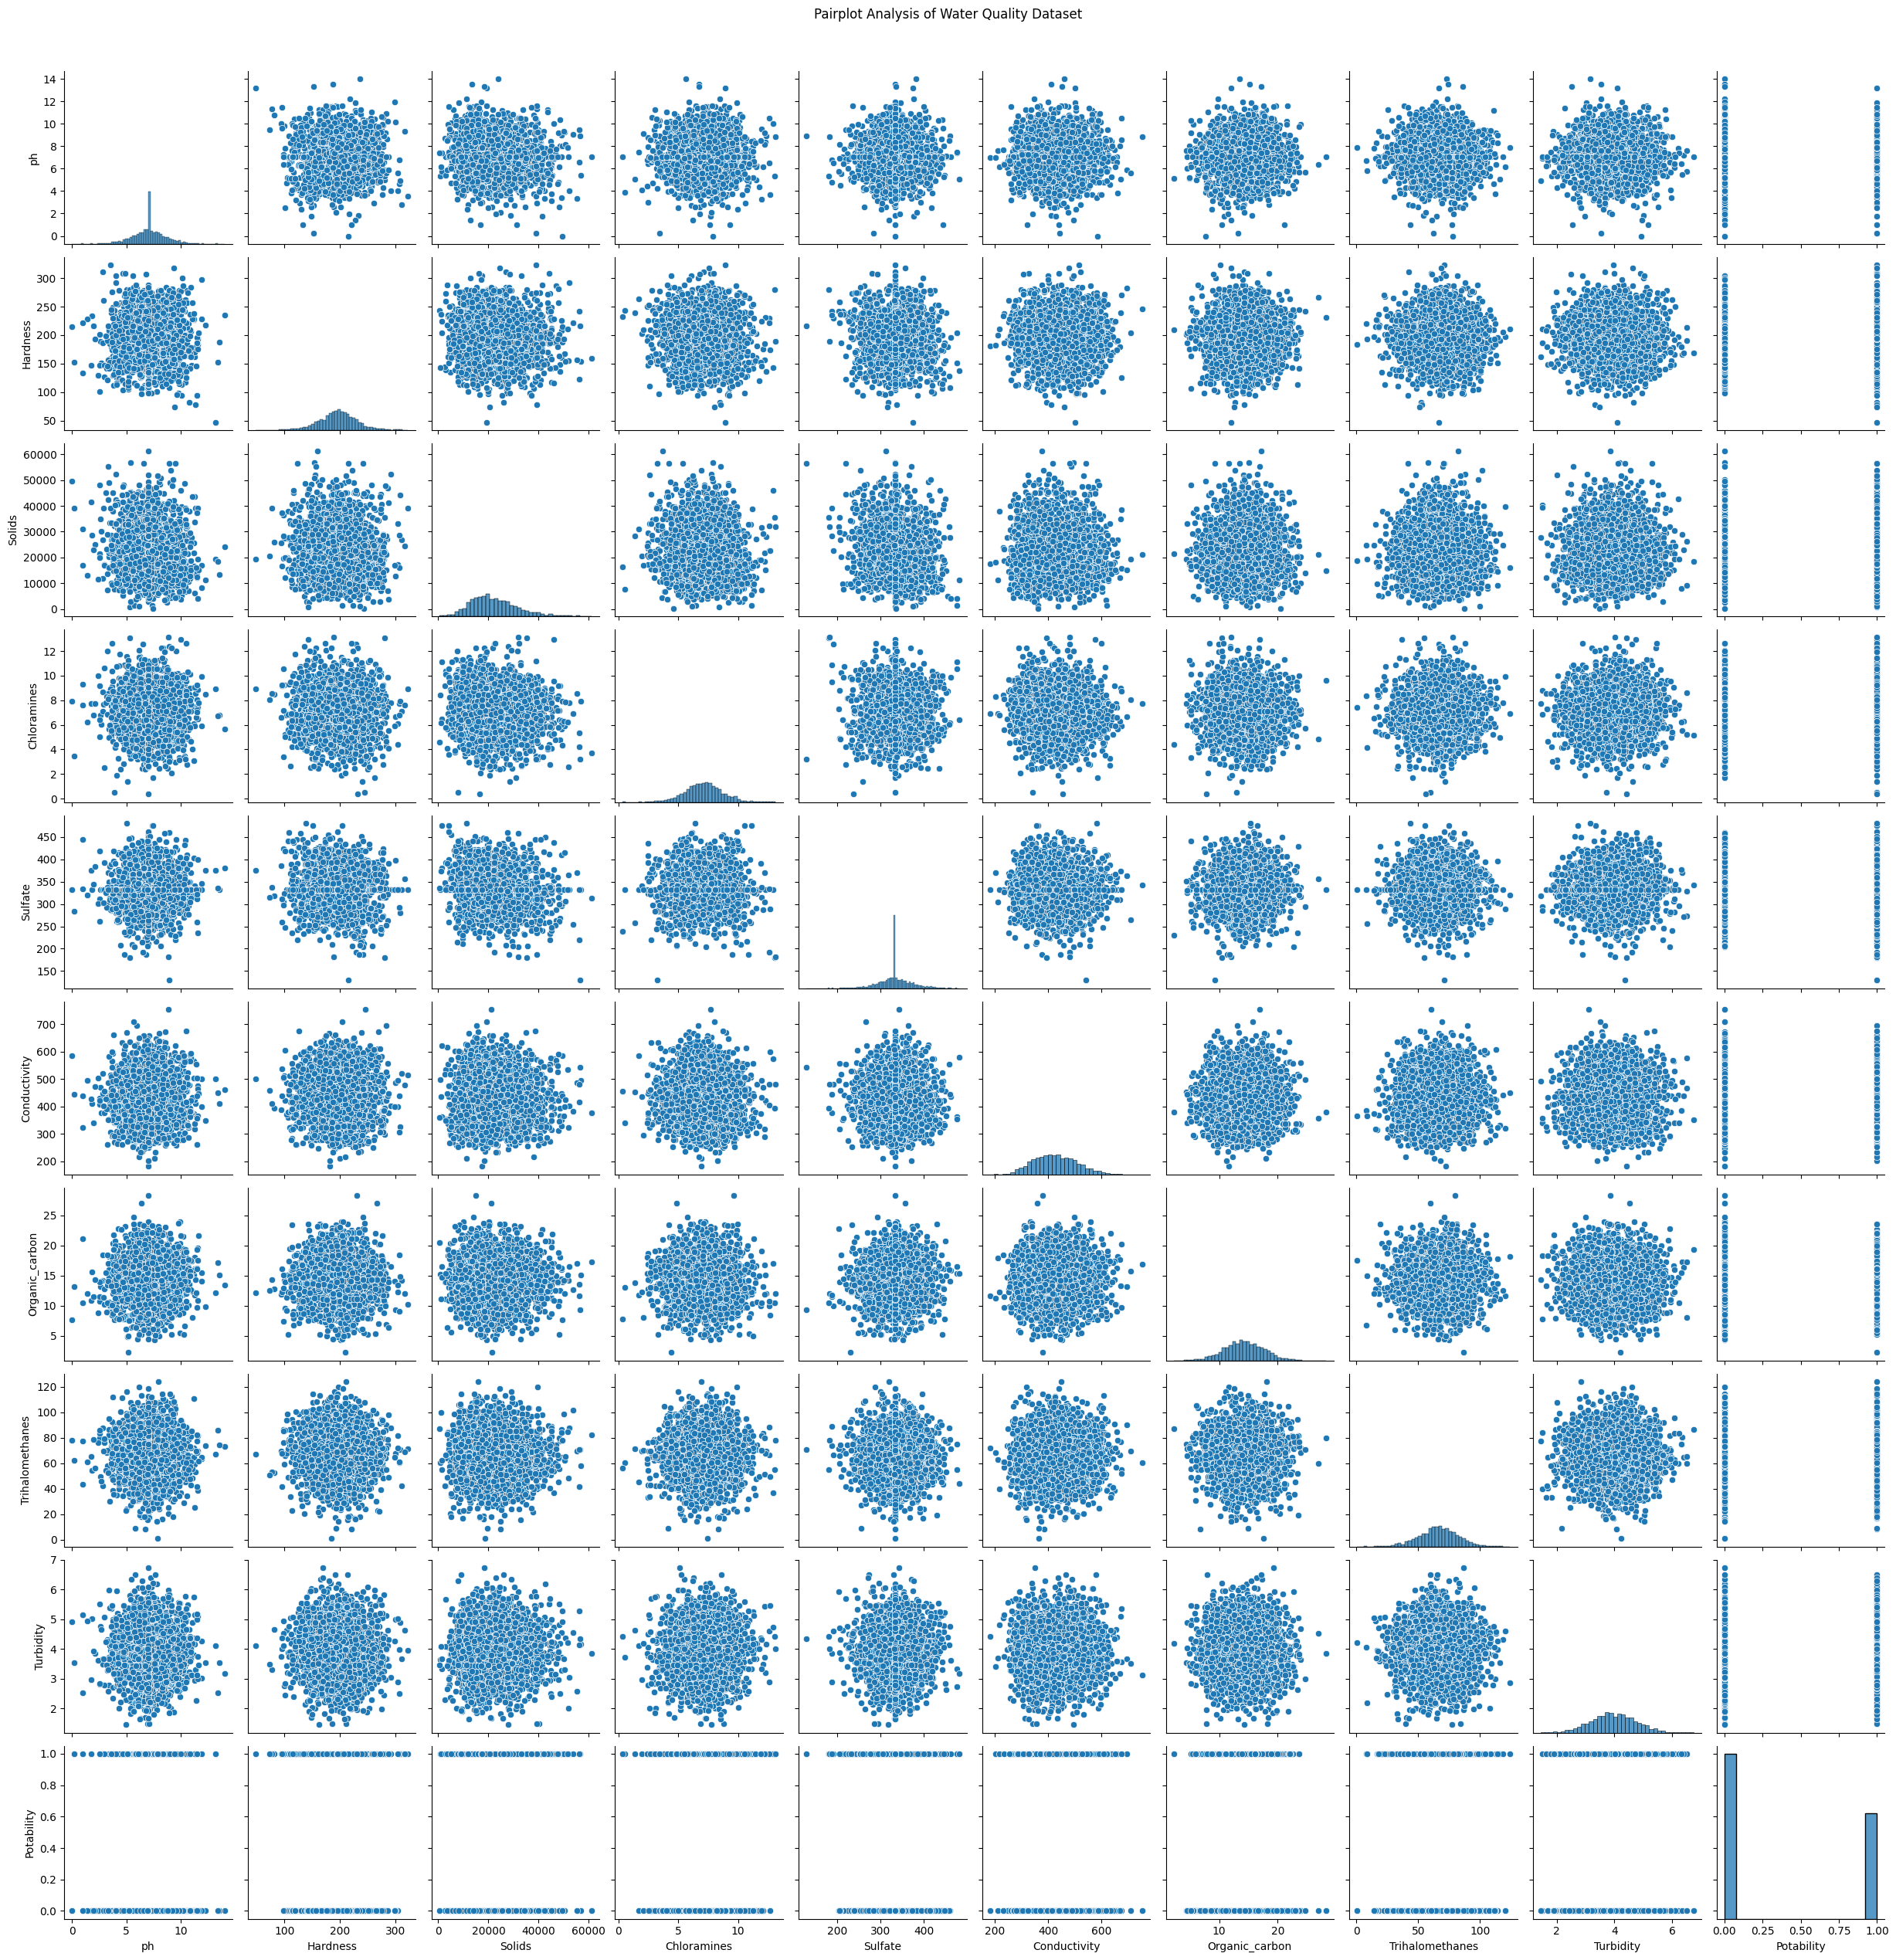

<ipython-input-28-a130f55fc020>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=column, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-28-a130f55fc020>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

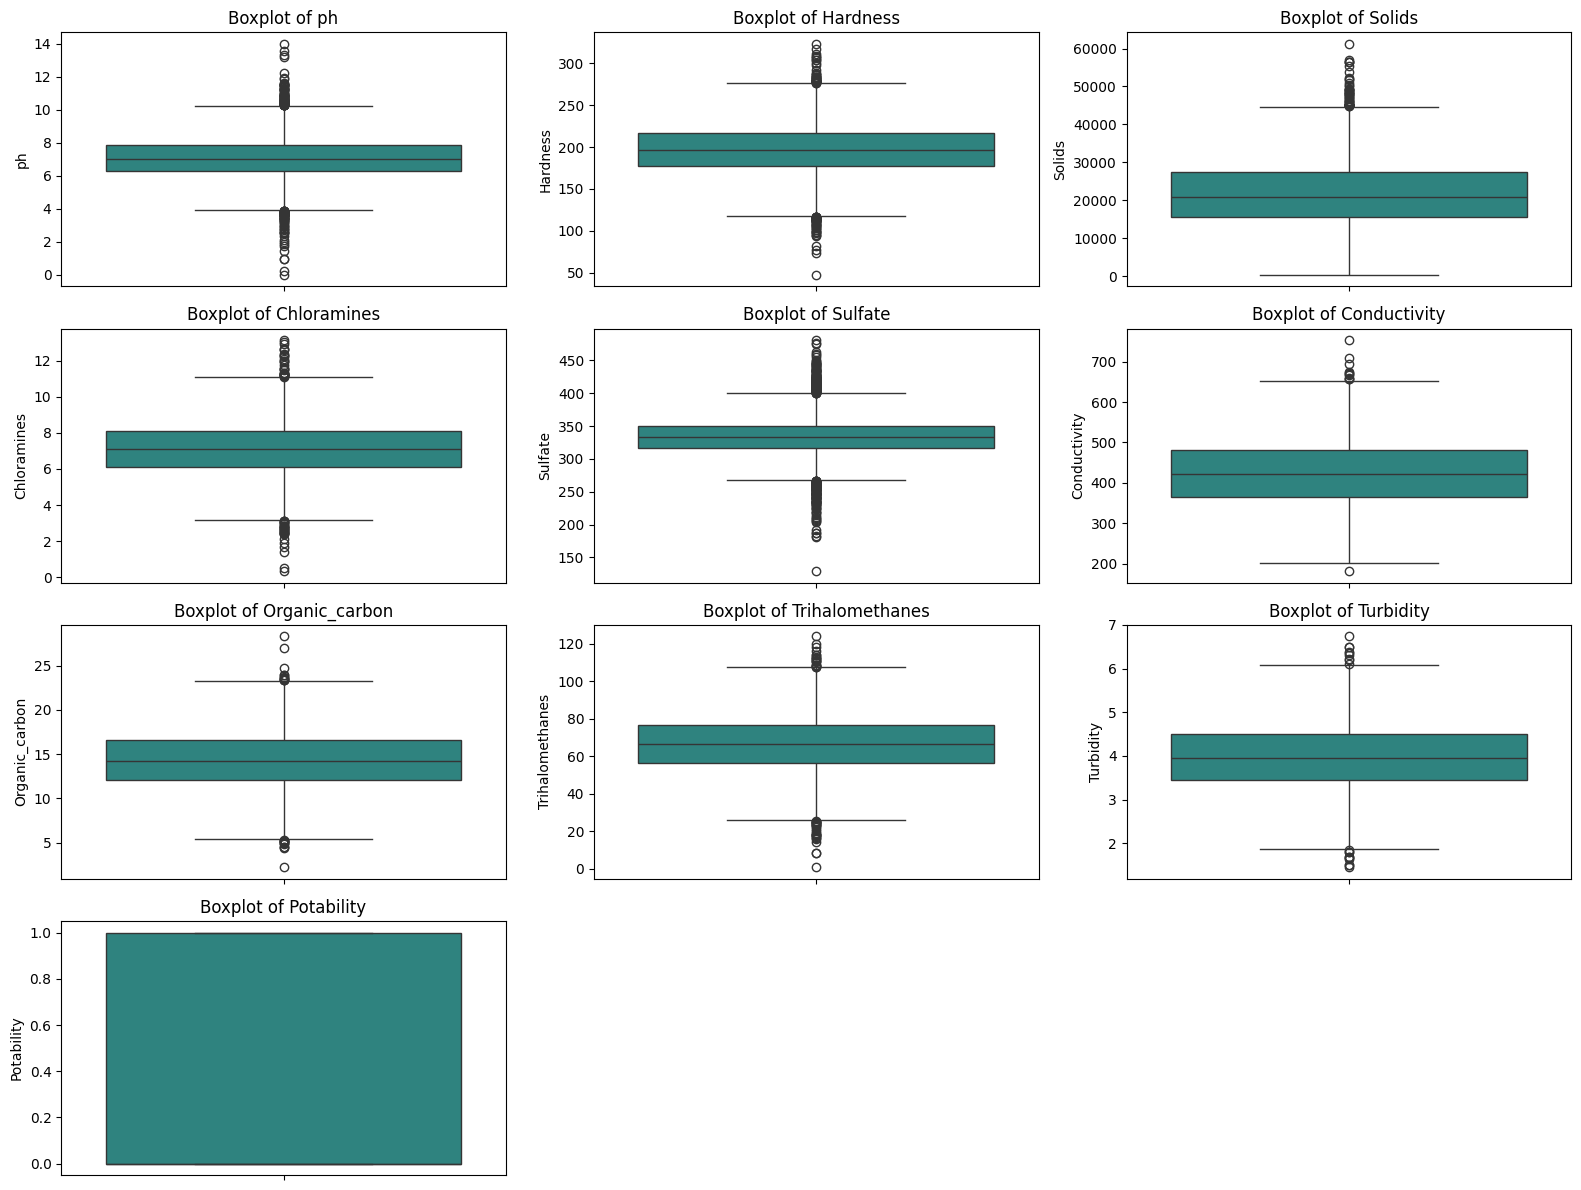

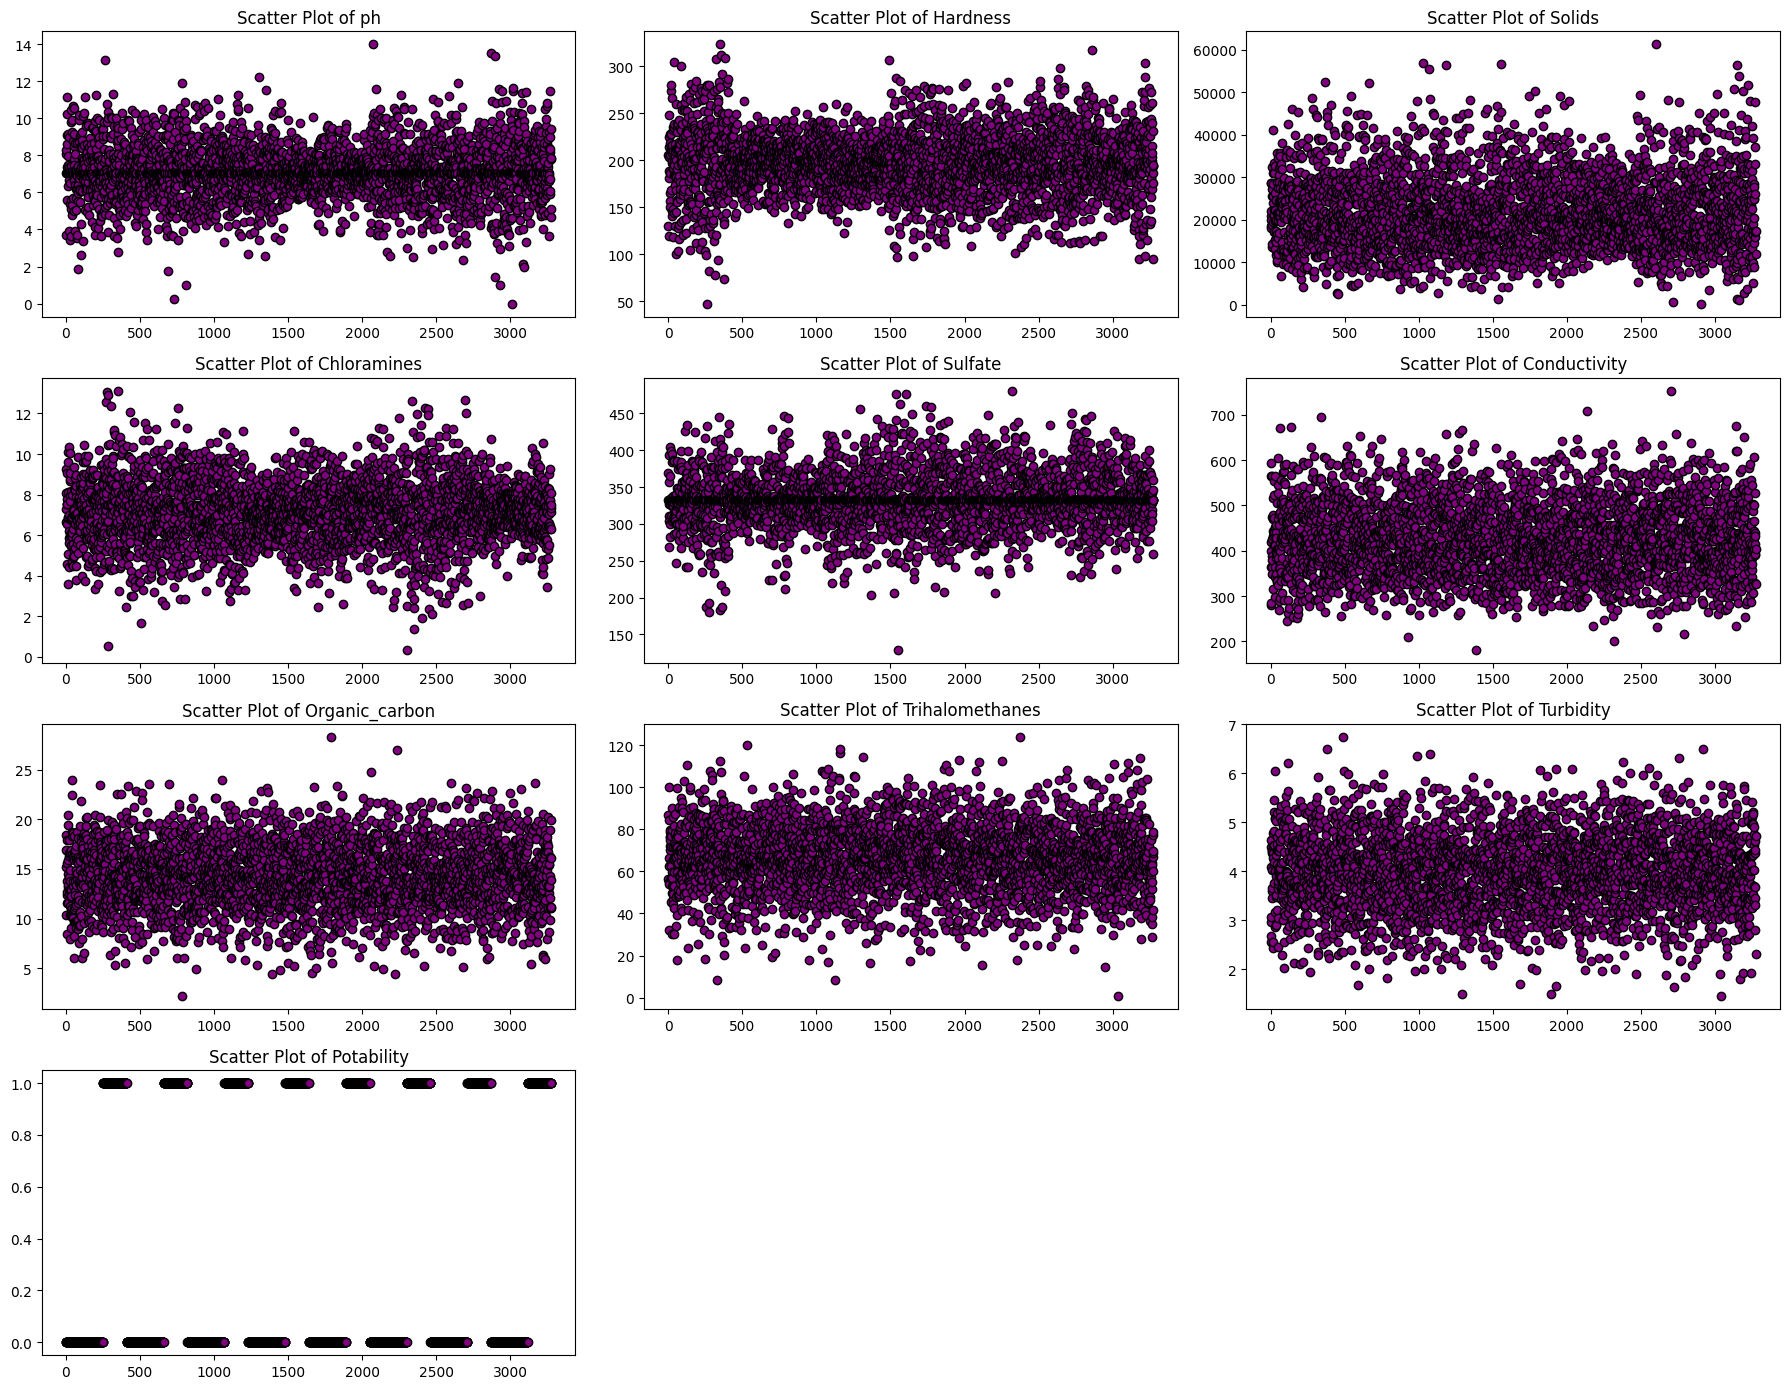

In [ ]:
# Comprehensive EDA on the newly cleaned dataset

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics
dataset_description = data.describe()

# 2. Histograms of all features
data.hist(figsize=(15, 12), bins=20, color='#6a0dad', edgecolor='black')
plt.suptitle("Histograms of Water Quality Features", y=1.02, fontsize=16)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(14, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Water Potability Features")
plt.show()

# 4. Pairplot Analysis
sns.pairplot(data, palette='viridis')
plt.suptitle("Pairplot Analysis of Water Quality Dataset", y=1.02)
plt.show()

# 5. Boxplot Analysis for Outliers
plt.figure(figsize=(16, 12))
num_columns = len(data.columns)
num_rows = (num_columns + 2) // 3  # Calculate rows needed for up to 3 columns per row
for idx, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 3, idx)
    sns.boxplot(data=data, y=column, palette='viridis')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 6. Individual Scatter Plots
num_columns = len(data.columns)  # Number of columns in the dataset
cols_per_row = 3  # Define how many columns you want per row of subplots
num_rows = -(-num_columns // cols_per_row)  # Calculate the number of rows needed

plt.figure(figsize=(18, num_rows * 3.5))  # Adjust figure size based on number of rows

for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, cols_per_row, i)
    plt.scatter(data.index, data[column], color='purple', edgecolor='black')
    plt.title(f'Scatter Plot of {column}')

plt.tight_layout()
plt.show()

<ipython-input-29-46d03c4f3159>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_data_capped, y=column, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-29-46d03c4f3159>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

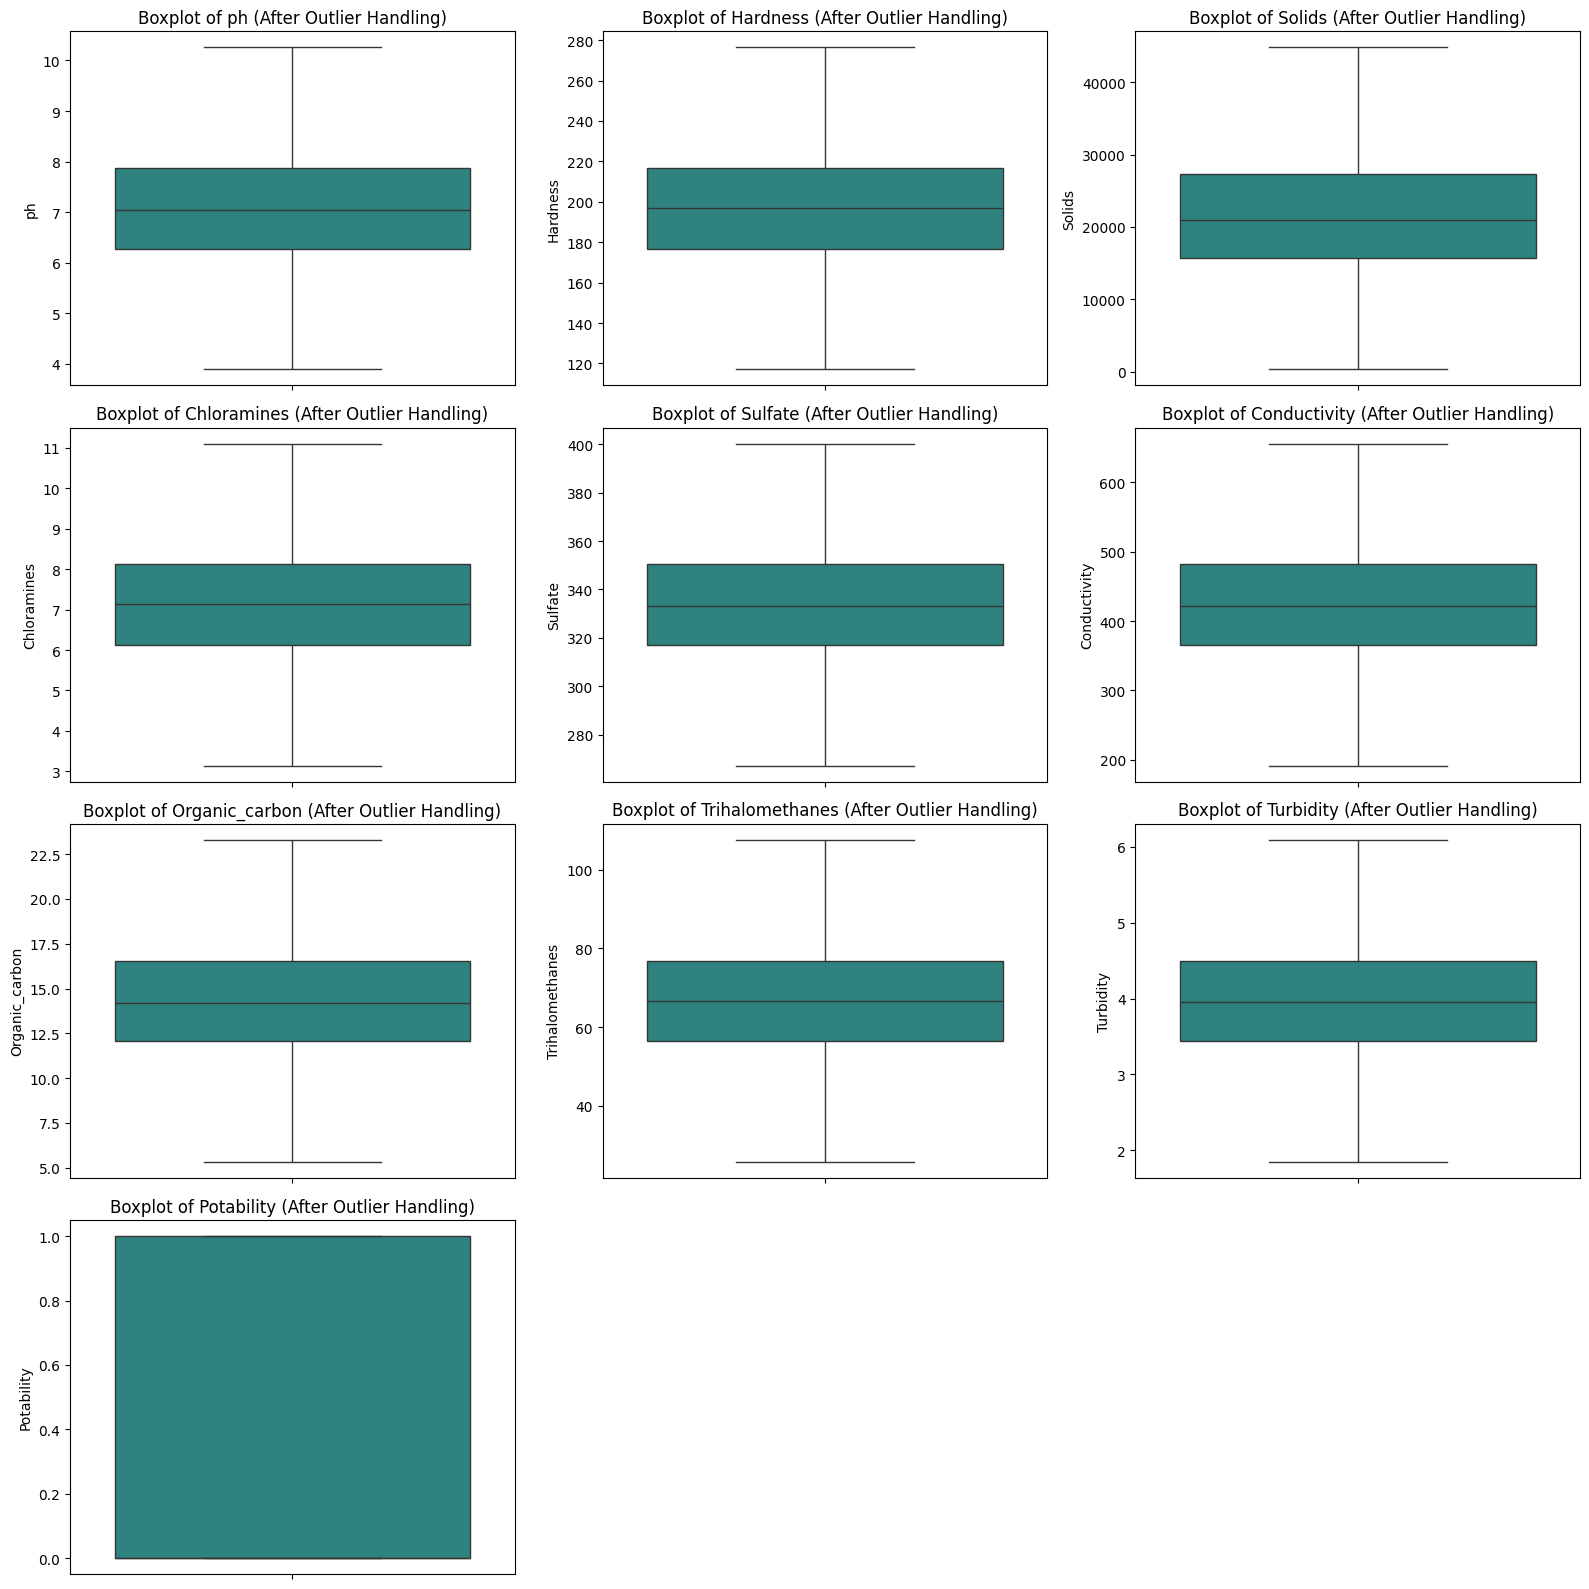

In [ ]:
# Handle outliers using IQR-based capping

# Calculate the IQR for each feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers in the dataset
new_data_capped = data.copy()
for column in new_data_capped.columns:
    new_data_capped[column] = new_data_capped[column].clip(lower=lower_bound[column], upper=upper_bound[column])


# Determine the number of columns in the DataFrame
num_columns = len(new_data_capped.columns)

# Set the number of columns per row
cols_per_row = 3

# Calculate the number of rows needed based on the number of columns
num_rows = (num_columns + cols_per_row - 1) // cols_per_row  # Ceiling division

# Adjust the figure size dynamically based on the number of rows
plt.figure(figsize=(16, 4 * num_rows))

for idx, column in enumerate(new_data_capped.columns, 1):
    plt.subplot(num_rows, cols_per_row, idx)  # Adjust grid size dynamically
    sns.boxplot(data=new_data_capped, y=column, palette='viridis')
    plt.title(f'Boxplot of {column} (After Outlier Handling)')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [ ]:
skewness_values = new_data_capped.skew()
skewness_values

ph                 0.054541
Hardness          -0.024977
Solids             0.484566
Chloramines       -0.017865
Sulfate            0.055554
Conductivity       0.240572
Organic_carbon     0.008749
Trihalomethanes   -0.052586
Turbidity         -0.014413
Potability         0.450784
dtype: float64

<ipython-input-31-89bed07d5505>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_data_transformed, y='Solids', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


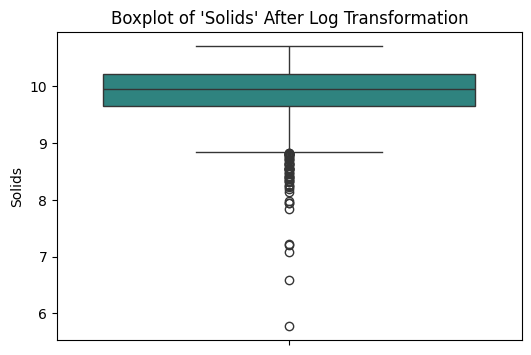

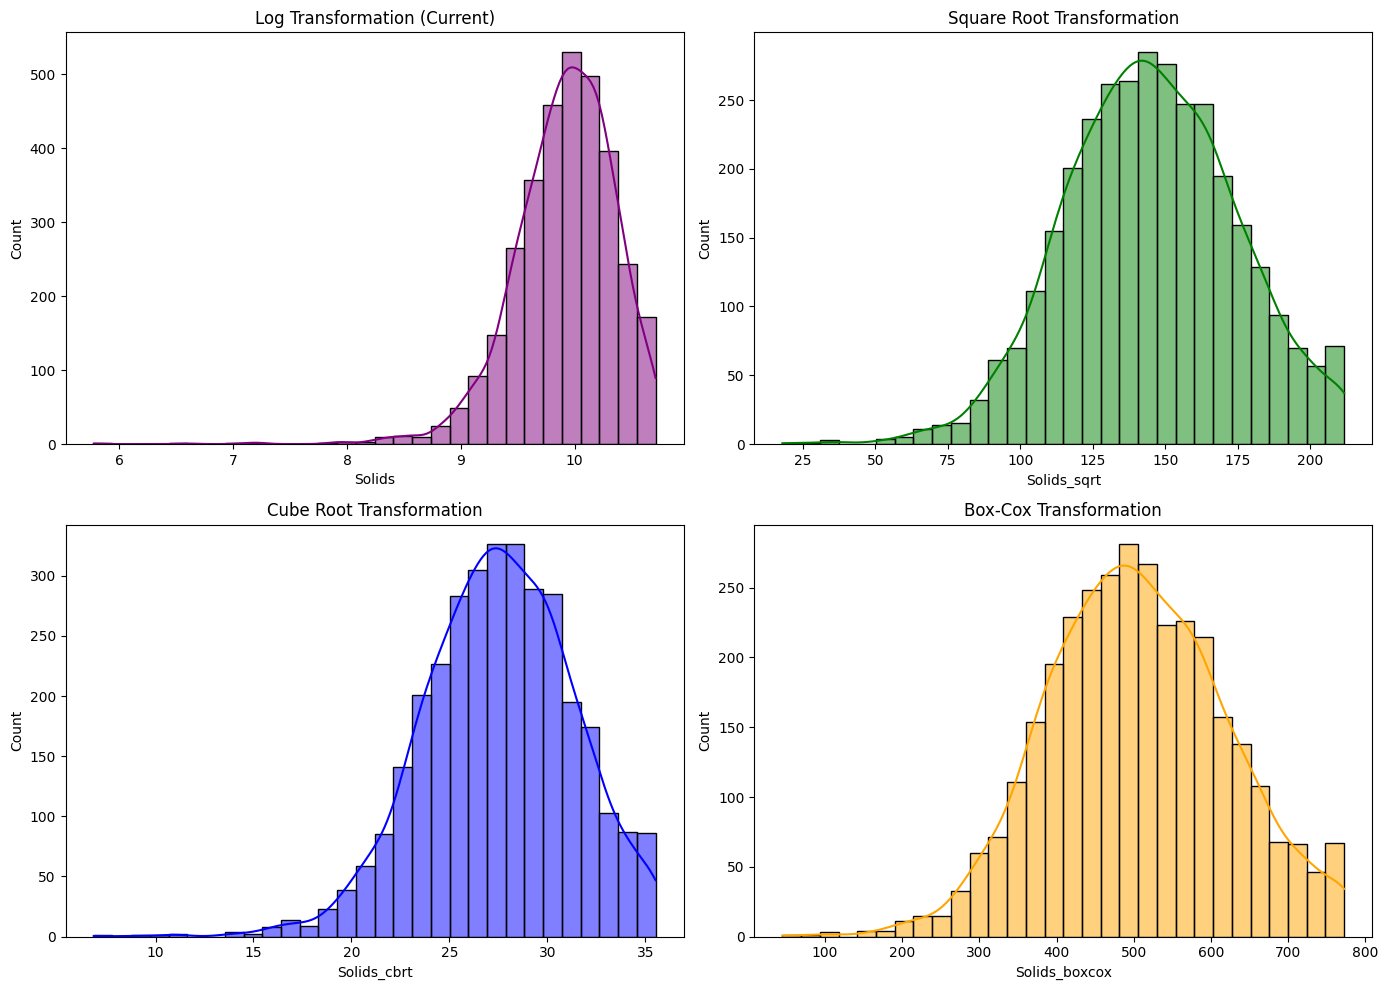

In [ ]:
from scipy.stats import boxcox

import numpy as np

# Apply log transformation to reduce skewness for the 'Solids' feature
new_data_transformed = new_data_capped.copy()
new_data_transformed['Solids'] = np.log1p(new_data_transformed['Solids'])

# Recalculate skewness after transformation
skewness_transformed = new_data_transformed.skew()

# Display boxplot for 'Solids' after transformation
plt.figure(figsize=(6, 4))
sns.boxplot(data=new_data_transformed, y='Solids', palette='viridis')
plt.title("Boxplot of 'Solids' After Log Transformation")
plt.show()

# Testing different transformations for the 'Solids' feature
# 1. Square Root Transformation
new_data_transformed['Solids_sqrt'] = np.sqrt(new_data_capped['Solids'])

# 2. Cube Root Transformation
new_data_transformed['Solids_cbrt'] = np.cbrt(new_data_capped['Solids'])

# 3. Box-Cox Transformation (Box-Cox requires strictly positive values, so adding a small constant)
new_data_transformed['Solids_boxcox'], _ = boxcox(new_data_capped['Solids'] + 1)

# Calculate skewness after applying different transformations
skewness_comparison = new_data_transformed[['Solids', 'Solids_sqrt', 'Solids_cbrt', 'Solids_boxcox']].skew()

# Visualize the distributions after transformations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(new_data_transformed['Solids'], bins=30, ax=axes[0, 0], kde=True, color='purple')
axes[0, 0].set_title("Log Transformation (Current)")

sns.histplot(new_data_transformed['Solids_sqrt'], bins=30, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title("Square Root Transformation")

sns.histplot(new_data_transformed['Solids_cbrt'], bins=30, ax=axes[1, 0], kde=True, color='blue')
axes[1, 0].set_title("Cube Root Transformation")

sns.histplot(new_data_transformed['Solids_boxcox'], bins=30, ax=axes[1, 1], kde=True, color='orange')
axes[1, 1].set_title("Box-Cox Transformation")

plt.tight_layout()
plt.show()

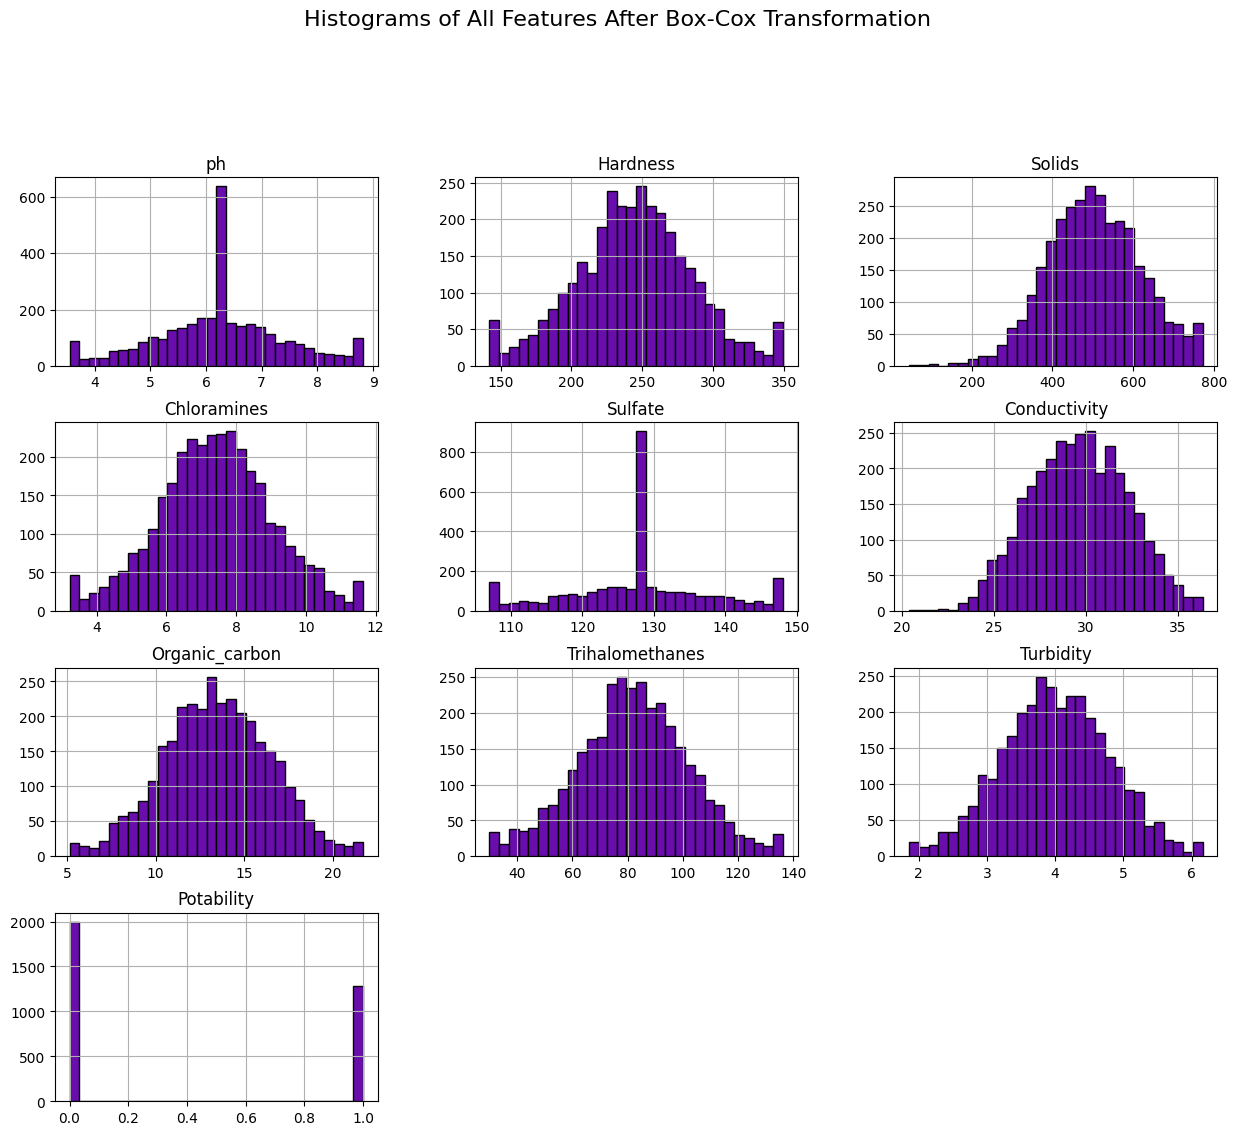

In [ ]:
# Applying Box-Cox Transformation to other skewed features
# Checking if there are any features requiring transformation
features_to_transform = new_data_capped.columns

# Initialize a dictionary to store transformed features
boxcox_transformed_data = new_data_capped.copy()

# Apply Box-Cox transformation to each feature if it's positive and skewed
for feature in features_to_transform:
    if (new_data_capped[feature] > 0).all():
        boxcox_transformed_data[feature], _ = boxcox(new_data_capped[feature] + 1)

# Calculate the skewness of all features after Box-Cox transformation
skewness_after_boxcox = boxcox_transformed_data.skew()

# Visualize the distribution of all features after applying Box-Cox Transformation
boxcox_transformed_data.hist(figsize=(15, 12), bins=30, color='#6a0dad', edgecolor='black')
plt.suptitle("Histograms of All Features After Box-Cox Transformation", y=1.02, fontsize=16)
plt.show()


In [ ]:
boxcox_transformed_data.skew()

ph                 0.004007
Hardness           0.000546
Solids             0.003282
Chloramines       -0.001458
Sulfate           -0.001183
Conductivity      -0.011460
Organic_carbon    -0.010256
Trihalomethanes   -0.007106
Turbidity         -0.010478
Potability         0.450784
dtype: float64